In [25]:
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter for DA
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [26]:
import seaborn as sns

In [27]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst')& (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])


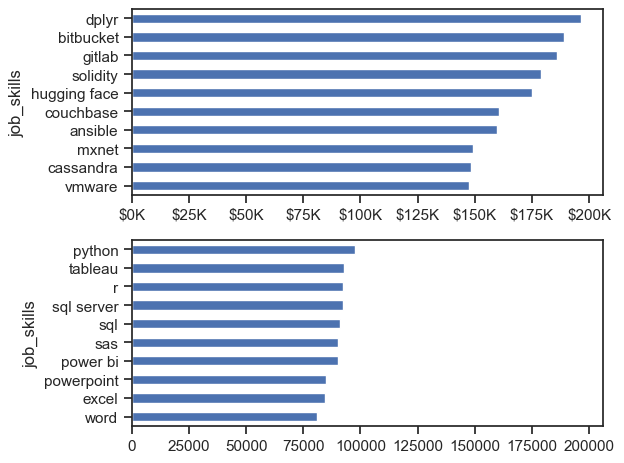

In [28]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

df_DA_US_Group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay = df_DA_US_Group.sort_values(by = 'median', ascending = False).head(10)

df_top_skills = df_DA_US_Group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False).head(10)

fig, ax = plt.subplots(2,1)

df_top_pay[::-1].plot(kind = 'barh', y= 'median', ax = ax[0],legend = False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
df_top_skills[::-1].plot(kind='barh', y = 'median', ax = ax[1],legend = False)
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

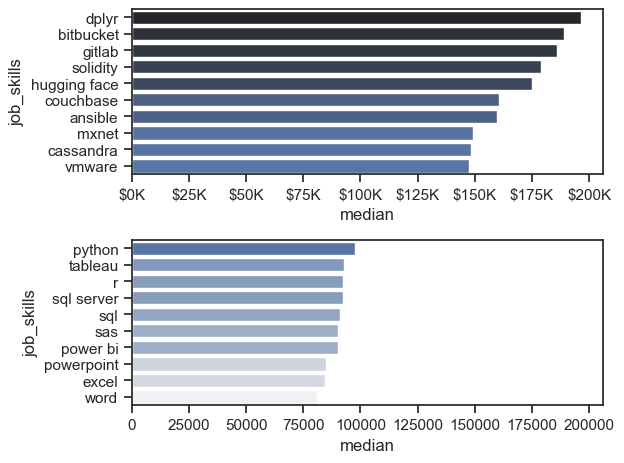

In [29]:
# using SEABORN 

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

df_DA_US_Group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay = df_DA_US_Group.sort_values(by = 'median', ascending = False).head(10)

df_top_skills = df_DA_US_Group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False).head(10)

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks') 


#df_top_pay[::-1].plot(kind = 'barh', y= 'median', ax = ax[0],legend = False)
sns.barplot(data = df_top_pay, x = 'median', y = df_top_pay.index, ax = ax[0], hue= 'median', palette= 'dark:b_r') # _r to reverse color 
ax[0].legend().remove()

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_top_skills[::-1].plot(kind='barh', y = 'median', ax = ax[1],legend = False)

sns.barplot(data = df_top_skills, x = 'median', y = df_top_skills.index, ax = ax[1], hue= 'median', palette = 'light:b')
ax[1].legend().remove()


ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

Text(0, 0.5, 'number of jobs')

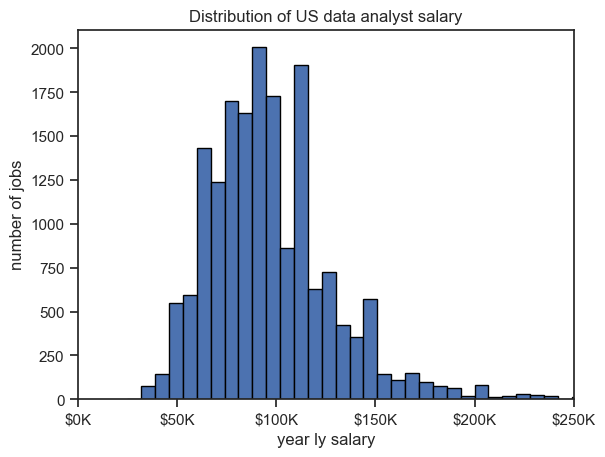

In [30]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins = 50, edgecolor = 'black')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title("Distribution of US data analyst salary")
plt.xlabel("year ly salary")
plt.ylabel('number of jobs')

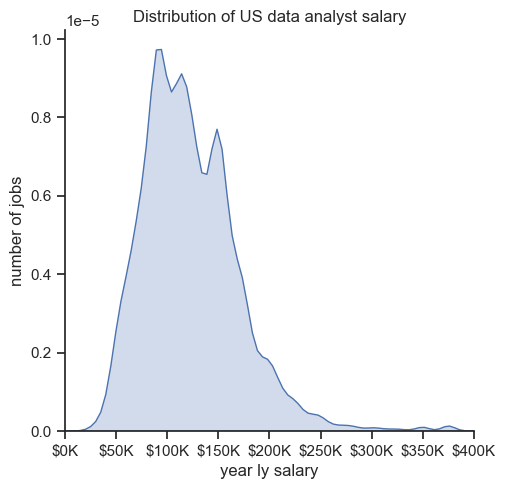

In [31]:
# SEABORN displot

sns.displot(df['salary_year_avg'], kind='kde', fill = True)



#df_DA_US['salary_year_avg'].plot(kind='hist', bins = 50, edgecolor = 'black')
plt.xlim(0,400000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title("Distribution of US data analyst salary")
plt.xlabel("year ly salary")
plt.ylabel('number of jobs')
plt.show()

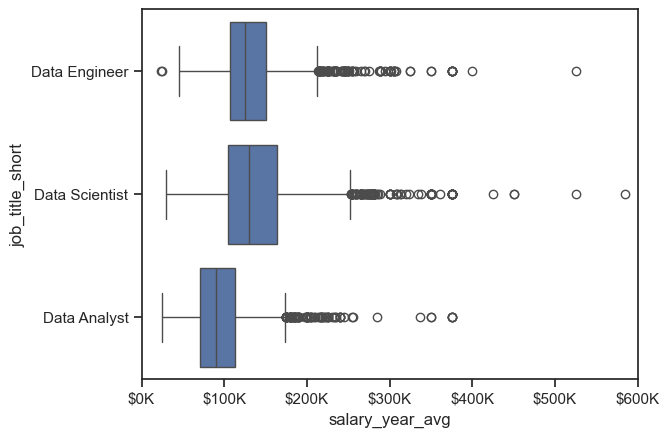

In [33]:
# boxplot in SEABORN

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles))& (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = 'salary_year_avg')
sns.boxplot(data=df_US, x= 'salary_year_avg', y ='job_title_short')

#plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.xlim(0,600000)
plt.show()